<a href="https://colab.research.google.com/github/ybarrientos13/data/blob/main/Resistencia%20al%20horimgon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Este notebook guía al estudiante en el análisis de datasets  públicos, donde deberá aplicar técnicas de regresión lineal.

## 📌 Instrucciones Generales
Para cada uno de los siguientes datasets:

1. **Describe** brevemente el problema y el significado de las variables, identifica su tipo (en caso de no poder usar variables categóricas, eliminalas para la construcción del modelo).
2. **Haz un análisis descriptivo** de los datos (estadísticas, correlaciones, gráficos).
3. **Verifica la existencia de outliers extremos**.
4. **Realiza una regresión lineal** simple o múltiple, justificando tu elección.
5. **Evalúa el desempeño del modelo** usando métricas apropiadas sobre datos de testeo.

Para esto descarga y sube los archivos a una cuenta de github que deberás crear.

## 📁 Dataset 1: Resistencia del Hormigón
Este es un ejemplo de pasos básicos a cumplir (obviamente deben ser profundizados adecuadamente).

- **Fuente**: UCI Machine Learning Repository  
- **Descripción**: Predicción de la resistencia a la compresión del hormigón a partir de sus componentes.
- **Link**: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
- **Formato**: CSV, solo variables numéricas.

🔽 **Carga tu archivo `Concrete_Data.csv` para comenzar.**

In [ ]:
# Cargar y visualizar datos
import pandas as pd
url = "https://raw.githubusercontent.com/ybarrientos13/Entregable---Datos-1/refs/heads/main/Copia%20de%20Concrete_Data.csv"
df = pd.read_csv(url)
df.columns = ["cement", "slag", "fly_ash", "water", "superplasticizer", "coarse_agg", "fine_agg", "age", "strength"]
df.head()

,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## 🔍 Paso 1: Descripción del problema y las variables

📌 ## 🔍 Paso 1: Descripción del problema y las variables
## Objetivo del Dataset

El propósito de este conjunto de datos es **predecir la resistencia a la compresión del concreto** (en megapascales, MPa),
basándose en la composición de la mezcla y el tiempo de curado.  
Este análisis es útil para optimizar mezclas, mejorar el desempeño estructural y reducir costos sin comprometer la calidad.

---

## Significado de las Variables (orden alfabético)

Todas las variables son **numéricas continuas** y representan cantidades usadas en la fabricación del concreto:

| Variable                                     | Descripción                                                                 | Unidades     |
|----------------------------------------------|-----------------------------------------------------------------------------|--------------|
| `Age (day)`                                  | Días de curado antes de medir la resistencia                               | días         |
| `Blast Furnace Slag (component 2)`           | Escoria de alto horno (puede sustituir parte del cemento)                  | kg/m³        |
| `Cement (component 1)`                       | Cantidad de cemento en la mezcla                                            | kg/m³        |
| `Coarse Aggregate (component 6)`             | Agregado grueso (como grava o piedra triturada)                            | kg/m³        |
| `Concrete compressive strength (MPa)`        | **Variable objetivo**: resistencia a la compresión del concreto            | MPa (megapascales) |
| `Fine Aggregate (component 7)`               | Agregado fino (como arena)                                                 | kg/m³        |
| `Fly Ash (component 3)`                      | Ceniza volante, subproducto industrial usado como material cementante      | kg/m³        |
| `Superplasticizer (component 5)`             | Aditivo que mejora la trabajabilidad sin añadir más agua                   | kg/m³        |
| `Water (component 4)`                        | Cantidad de agua utilizada                                                  | kg/m³        |


## 📊 Paso 2: Análisis descriptivo

In [ ]:

print("Tamaño del dataset:  filas", df.shape[0], "colmnas: ", df.shape[1])
df.head(10)
dimensiones = df.shape
print(f"El dataset tiene {dimensiones[0]} filas y {dimensiones[1]} columnas")
df.describe()

Tamaño del dataset:  filas 1030 colmnas:  9
El dataset tiene 1030 filas y 9 columnas


,cement,slag,fly_ash,water,superplasticizer,coarse_agg,fine_agg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


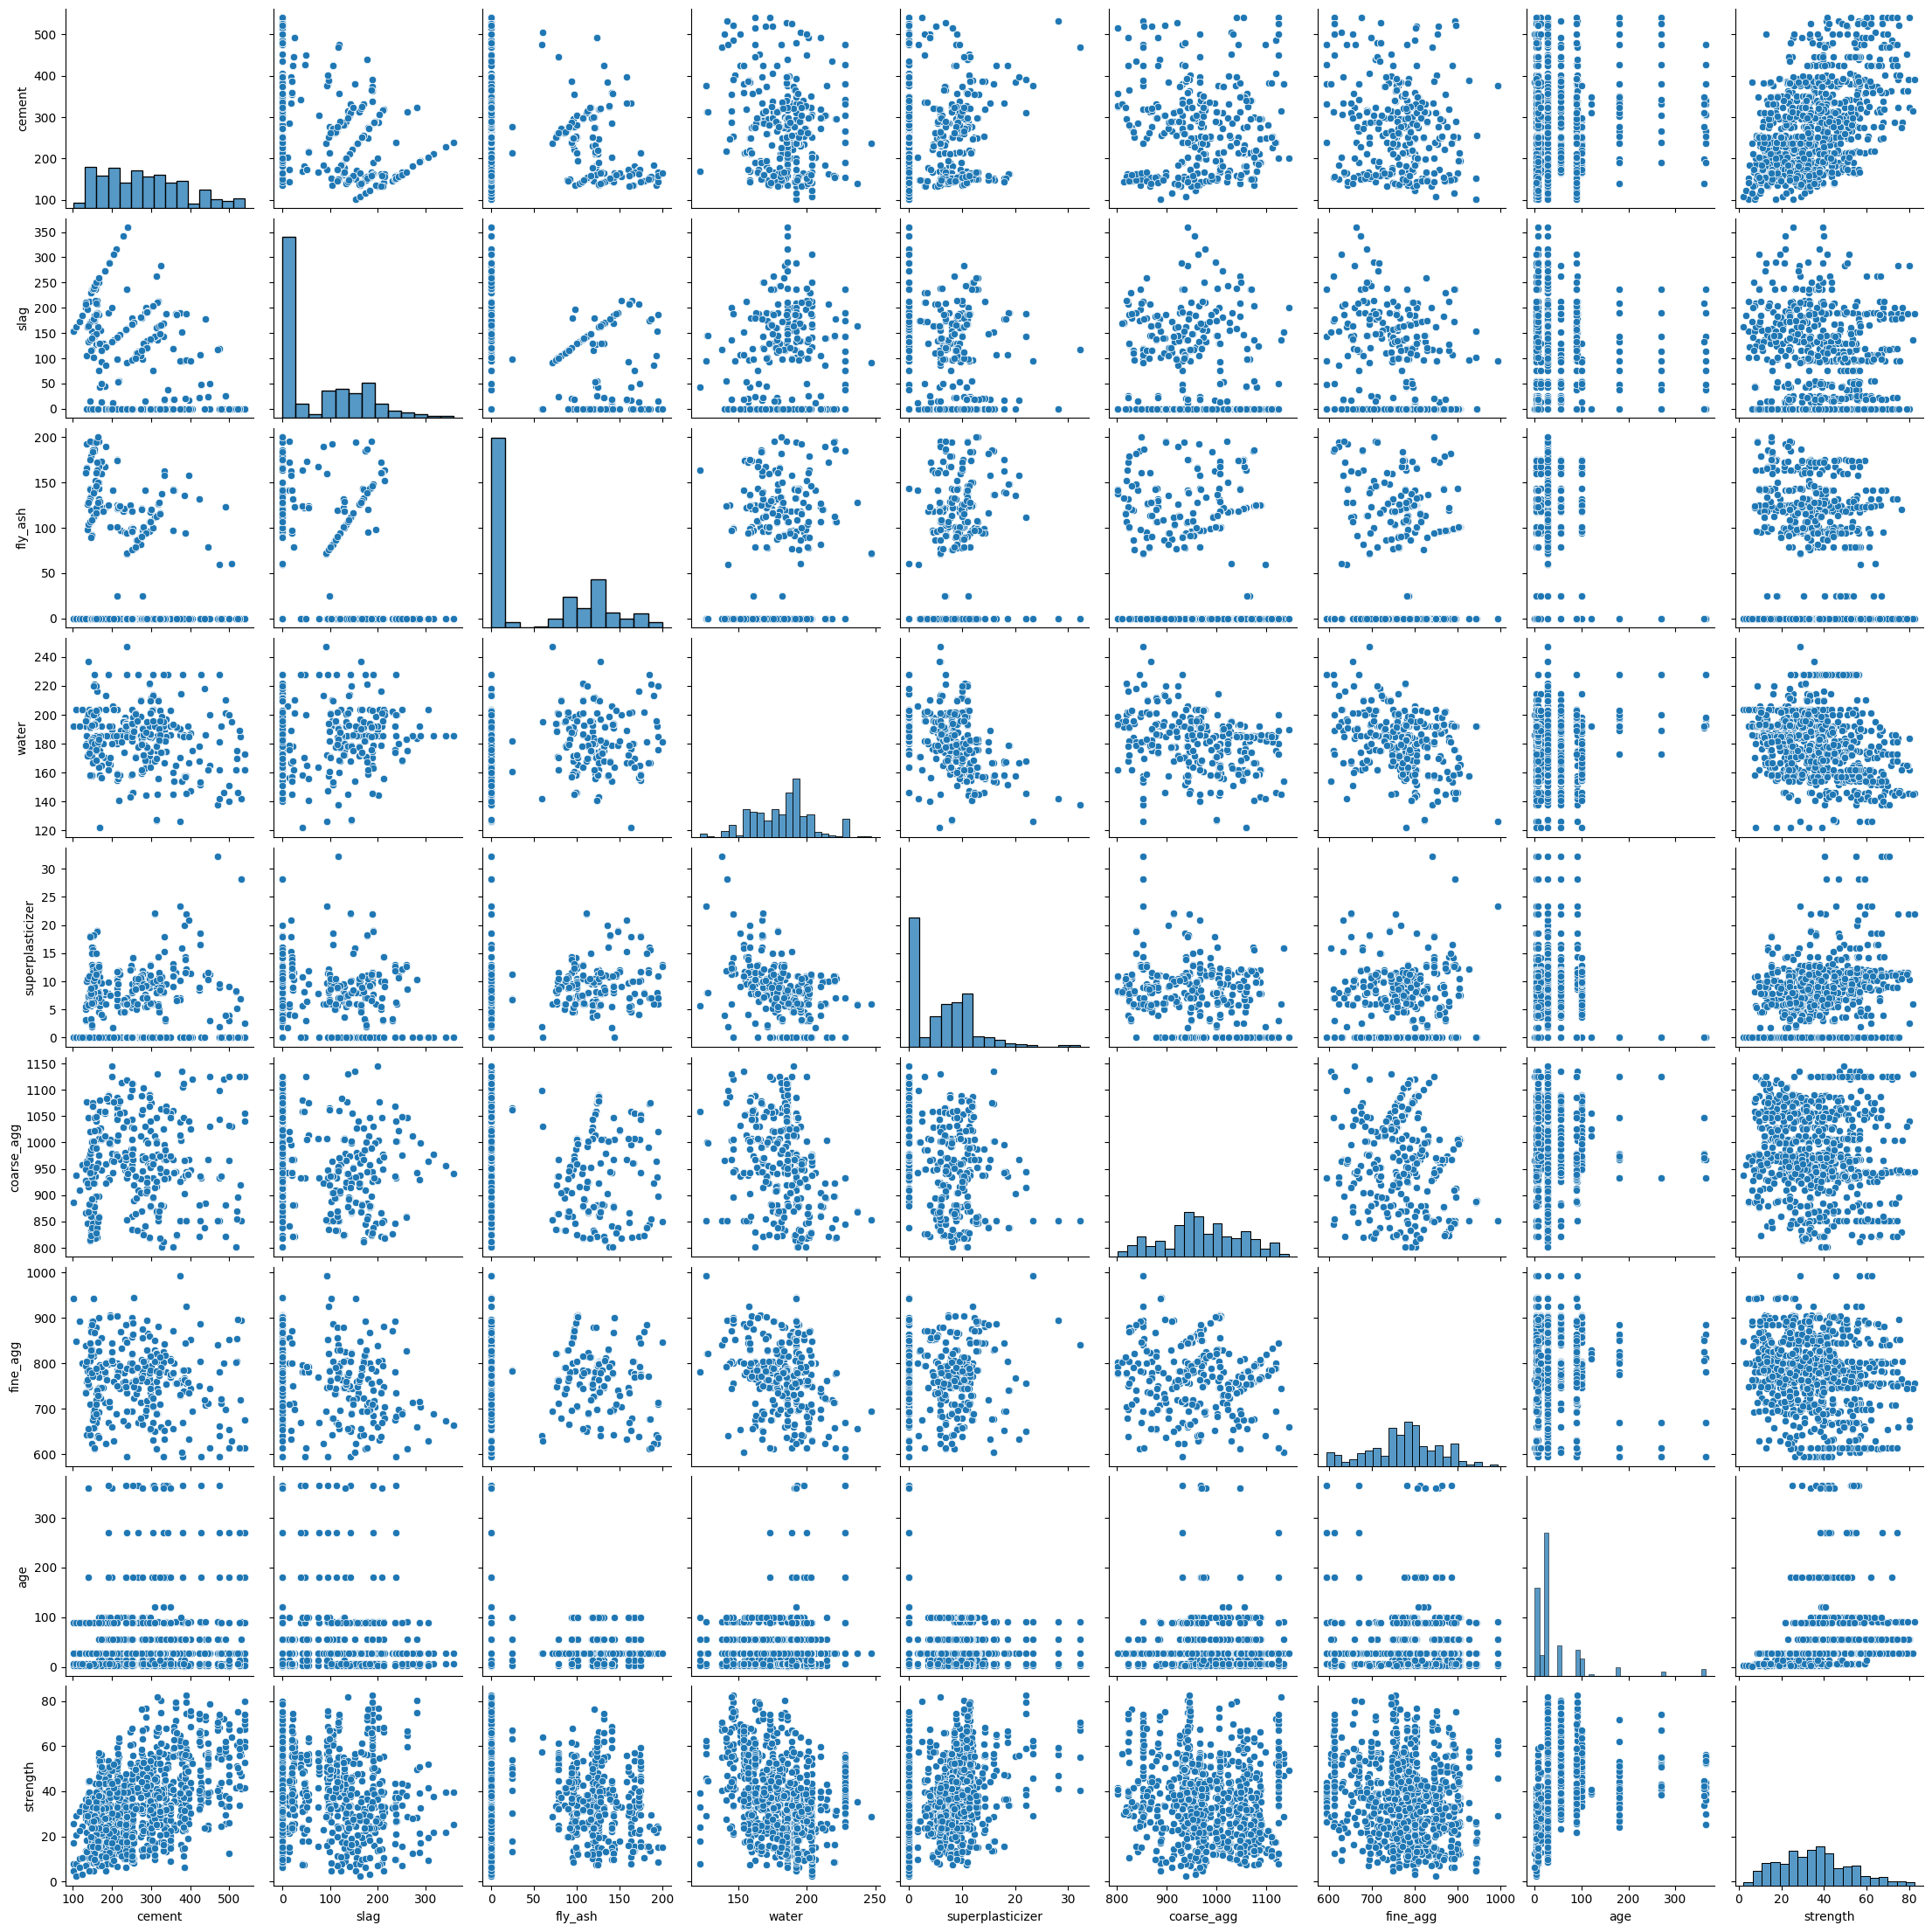

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

## ⚠️ Paso 3: Detección de outliers extremos

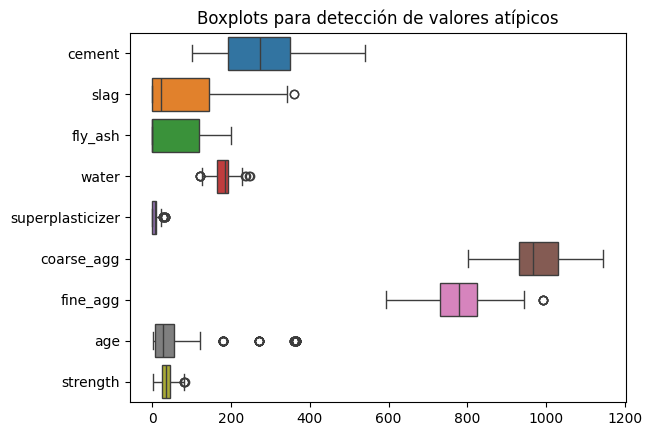

In [ ]:
sns.boxplot(data=df, orient='h')
plt.title("Boxplots para detección de valores atípicos")
plt.show()

## 📈 Paso 4: Regresión Lineal

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop("strength", axis=1)
y = df["strength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 🧪 Paso 5: Evaluación del modelo

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R²: 0.6234704748356754
MSE: 95.88863777582232


## ✅ Repite estos pasos con otros datasets como:

1) Concrete compressive strenght (UCI): https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength
2) Energy Efficiency (UCI): https://archive.ics.uci.edu/ml/datasets/Energy+efficiency
3) Crop recommendation dataset: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset  (regresión logística)

